In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.formula.api as sm
import statsmodels.api as smf

In [89]:
weather = pd.read_csv('weatherHistory.csv', na_values='null').dropna()
weather.head()

,Summary,Precip_Type,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure,Daily_Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [90]:
from statsmodels.multivariate import manova
from statsmodels.stats import anova
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [91]:
manova1 = manova.MANOVA.from_formula('Temperature+Apparent_Temperature+Humidity+Wind_Speed+Wind_Bearing+Visibility+Pressure~Precip_Type', data=weather)

In [92]:
print(manova1.mv_test())

                      Multivariate linear model
                                                                      
----------------------------------------------------------------------
       Intercept         Value   Num DF   Den DF     F Value    Pr > F
----------------------------------------------------------------------
          Wilks' lambda   0.0077 7.0000 95928.0000 1774067.0063 0.0000
         Pillai's trace   0.9923 7.0000 95928.0000 1774067.0063 0.0000
 Hotelling-Lawley trace 129.4561 7.0000 95928.0000 1774067.0063 0.0000
    Roy's greatest root 129.4561 7.0000 95928.0000 1774067.0063 0.0000
----------------------------------------------------------------------
                                                                      
-----------------------------------------------------------------------
       Precip_Type        Value   Num DF    Den DF     F Value   Pr > F
-----------------------------------------------------------------------
           Wilks' lambda  

In [93]:
fitAnova1 = sm.ols('Temperature~Precip_Type', data=weather).fit()

In [94]:
anova.anova_lm(fitAnova1)

,df,sum_sq,mean_sq,F,PR(>F)
Precip_Type,1.0,2.790326e+06,2.790326e+06,44636.071059,0.0
Residual,95934.0,5.997103e+06,6.251280e+01,NaN,NaN


In [95]:
fitAnova2 = sm.ols('Humidity~Precip_Type', data=weather).fit()
anova.anova_lm(fitAnova2)

,df,sum_sq,mean_sq,F,PR(>F)
Precip_Type,1.0,198.869185,198.869185,5488.264319,0.0
Residual,95934.0,3476.202187,0.036235,NaN,NaN


In [96]:
fitAnova3 = sm.ols('Wind_Speed~Precip_Type', data=weather).fit()
anova.anova_lm(fitAnova3)

,df,sum_sq,mean_sq,F,PR(>F)
Precip_Type,1.0,2.110420e+04,21104.197959,442.649624,4.784789e-98
Residual,95934.0,4.573844e+06,47.676982,NaN,NaN


In [97]:
fitAnova4 = sm.ols('Pressure~Precip_Type', data=weather).fit()
anova.anova_lm(fitAnova4)

,df,sum_sq,mean_sq,F,PR(>F)
Precip_Type,1.0,1.134223e+05,113422.335546,8.247188,0.004082
Residual,95934.0,1.319366e+09,13752.850234,NaN,NaN


In [98]:
fitAnova5 = sm.ols('Visibility~Precip_Type', data=weather).fit()
anova.anova_lm(fitAnova5)

,df,sum_sq,mean_sq,F,PR(>F)
Precip_Type,1.0,1.673929e+05,167392.874419,10678.466027,0.0
Residual,95934.0,1.503837e+06,15.675742,NaN,NaN


In [99]:
fitAnova6 = sm.ols('Apparent_Temperature~Precip_Type', data=weather).fit()
anova.anova_lm(fitAnova6)

,df,sum_sq,mean_sq,F,PR(>F)
Precip_Type,1.0,3.531108e+06,3.531108e+06,45232.920244,0.0
Residual,95934.0,7.489088e+06,7.806500e+01,NaN,NaN


In [100]:
tukey1 = pairwise_tukeyhsd(weather['Temperature'], weather['Precip_Type'])
tukey1._results_table

group1,group2,meandiff,p-adj,lower,upper,reject
rain,snow,-17.1239,0.0,-17.2827,-16.965,True


In [101]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = pd.DataFrame(weather.Temperature)
y = weather.Humidity
model.fit(x, y)


LinearRegression()

In [102]:
fit1 = sm.ols('Pressure~Humidity', data=weather).fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Pressure   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.772
Date:                Mon, 27 Mar 2023   Prob (F-statistic):             0.0960
Time:                        21:42:27   Log-Likelihood:            -5.9322e+05
No. Observations:               95936   AIC:                         1.186e+06
Df Residuals:                   95934   BIC:                         1.186e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1000.7834      1.471    680.281      0.000     997.900    1003.667
Humidity       3.2206      1.935      1.665      0.096      -0.571       7.012
==============================================================================
Omnibus:                   132070.853   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20088689.227
Skew:                          -8.399   Prob(JB):                         0.00
Kurtosis:                      71.872   Cond. No.                         7.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Humidity', ylabel='Temperature'>

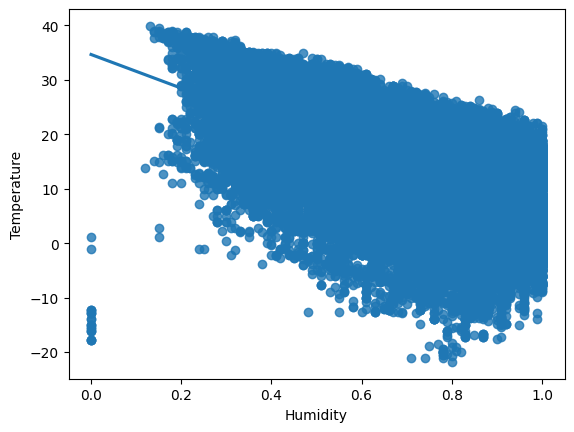

In [103]:
sns.regplot(data=weather, x=weather.Humidity, y=weather.Temperature)

In [111]:
from scipy.stats import ttest_ind
ttest_ind(weather.Temperature, weather.Apparent_Temperature, alternative='two-sided')

Ttest_indResult(statistic=23.24667614747214, pvalue=2.250304824187179e-119)